<a href="https://colab.research.google.com/github/rania593/checkpoint-python/blob/main/checkpoint5_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
nbr of elements 891
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
D              3
              ..
D56            1
A23            1
B101           1
E36            1
E10            1
Name: Cabin, Length: 147, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.000000,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,G6,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.000000,0,0,2669,7.2292,G6,C
888,535,No,3,"Cacic, Miss. Marija",female,30.000000,0,0,315084,8.6625,G6,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,0,0,349215,7.8958,G6,S


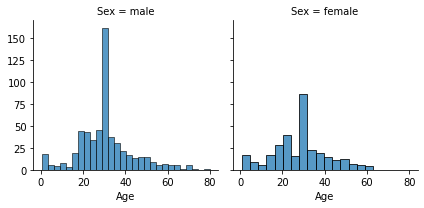

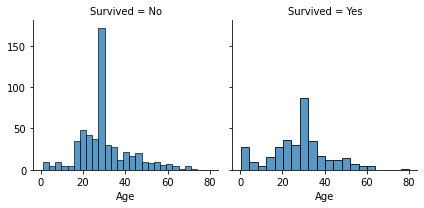

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Preprocessing part1
df=pd.read_csv("/content/titanic-passengers.csv",sep=(';')) #import file - copier lien de chemin- puis l'insérer dans la fonction pd.read csv
df
print(df.columns)  
df.isnull().sum()
df.describe()
#
nb_elements=len(df["Cabin"]) #voir l'élement avec la plus grande fréquence
print("nbr of elements",nb_elements)
print(df["Cabin"].value_counts())
#
df["Cabin"].fillna(value="G6",inplace=True) #remplacer NaN values by G6
df['Age'].fillna(df['Age'].mean(),inplace=True) #remplacer Nan values by the mean
df

############
#Visualization part 2
import seaborn as sns

g = sns.FacetGrid(df,col="Sex")
g.map(sns.histplot,"Age")


g = sns.FacetGrid(df,col="Survived")
g.map(sns.histplot,"Age")



#####

df

,Pclass
Survived,
No,2.531876
Yes,1.950292


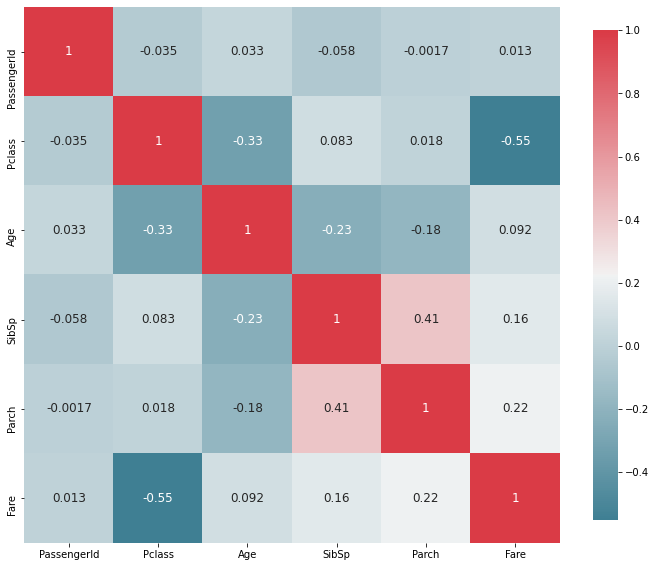

In [ ]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(df)


# this function gives us the correlation between every attribuate 

#we cant to see the impact of Home Adress on the variable Promoted
cleanup={"Survived":{"yes":1, "no": 0}}  # at first, let's convert survives to numerical format
df.replace(cleanup, inplace=True)
df[["Pclass", "Survived"]].groupby(["Survived"], as_index=True).mean()

########


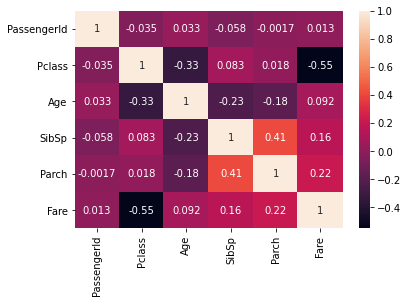

In [ ]:
x=df.corr()
sns.heatmap(x, annot=True)

In [ ]:
#create new column TITLE and drop useless columns
df=df.drop(['PassengerId','SibSp','Parch', 'Ticket', 'Cabin', 'Embarked'],axis=1)
l = [name[name.find(',')+2: name.find('.')] for name in df['Name']]
df['title']=pd.DataFrame(l)
df


,Survived,Pclass,Name,Sex,Age,Fare,title
0,No,2,"Collander, Mr. Erik Gustaf",male,28.000000,13.0000,Mr
1,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,7.6500,Mr
2,No,3,"Jensen, Mr. Hans Peder",male,20.000000,7.8542,Mr
3,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,21.0750,Mrs
4,No,1,"Davidson, Mr. Thornton",male,31.000000,52.0000,Mr
...,...,...,...,...,...,...,...
886,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,30.0708,Mrs
887,No,3,"Sirayanian, Mr. Orsen",male,22.000000,7.2292,Mr
888,No,3,"Cacic, Miss. Marija",female,30.000000,8.6625,Miss
889,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,7.8958,Mr


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


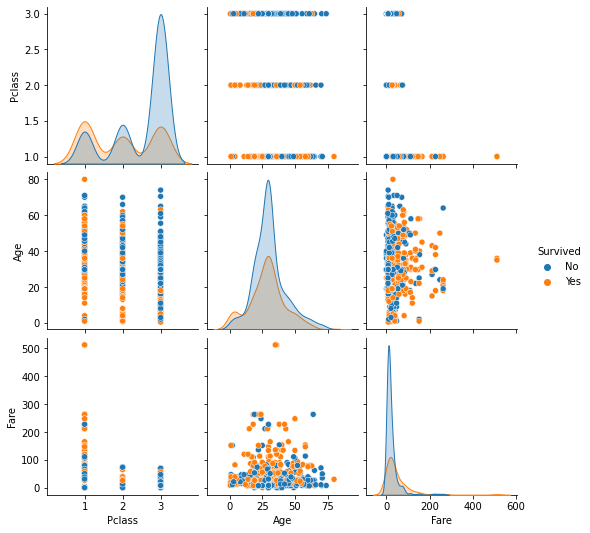

In [ ]:
sns.pairplot(df, hue='Survived', size=2.5)

#Label encoding


In [ ]:
df["Survived"]=df["Survived"].map({"yes": 1, "no": 0})   #convert survived variable into numerical
df.head()
df["Sex"]=df["Sex"].map({"male": 1, "female": 0}) 


In [ ]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#features extraction
X =df['Sex','Fare']
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance

print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))



KeyError: ignored

In [ ]:
import seaborn as sns
sns.regplot(x='gmat',y='admitted',data=data)

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)